Q. wine.csv로 와의 품종을 예측하는 모델을 텐서플로/케라스로 아래와 같이 생성하고 학습 및 평가를 수행하세요.
- 입력층 :  Input 레이어 shape=(12,)
- 첫번째층 : 30, activation='relu'
- 두번째층 :12, activation='relu'
- 세번째층 :8, activation='relu'
- 출력층 :1, activation='sigmoid'

## 와인의 종류 예측하기

- 속성 12개 : 주석산 농도, 아세트산 농도, 구연산 농도, 잔류 당분 농도, 염화나트륨 농도, 유리 아황산 농도, 총 아황산 농도, 밀도, pH, 황산칼륨 농도, 알코올 도수, 와인의 맛(0~10등급), 클래스(1:레드 와인, 0: 화이트 와인)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/kdt_240424/m6_dl/data/wine.csv')
df

,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6492,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6493,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6494,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
df.isnull().sum()

,0
7.4,0
0.7,0
0,0
1.9,0
0.076,0
11,0
34,0
0.9978,0
3.51,0
0.56,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6496 entries, 0 to 6495
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.4     6496 non-null   float64
 1   0.7     6496 non-null   float64
 2   0       6496 non-null   float64
 3   1.9     6496 non-null   float64
 4   0.076   6496 non-null   float64
 5   11      6496 non-null   float64
 6   34      6496 non-null   float64
 7   0.9978  6496 non-null   float64
 8   3.51    6496 non-null   float64
 9   0.56    6496 non-null   float64
 10  9.4     6496 non-null   float64
 11  5       6496 non-null   int64  
 12  1       6496 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [ ]:
df_corr = df.corr()
df_corr_sort = df_corr.sort_values('1', ascending=False)
df_corr_sort
df_corr_sort['1']

,1
1,1.000000
0.7,0.652841
0.076,0.512658
0.56,0.487282
7.4,0.486817
0.9978,0.390491
3.51,0.328801
9.4,-0.032733
5,-0.119107
0,-0.186919


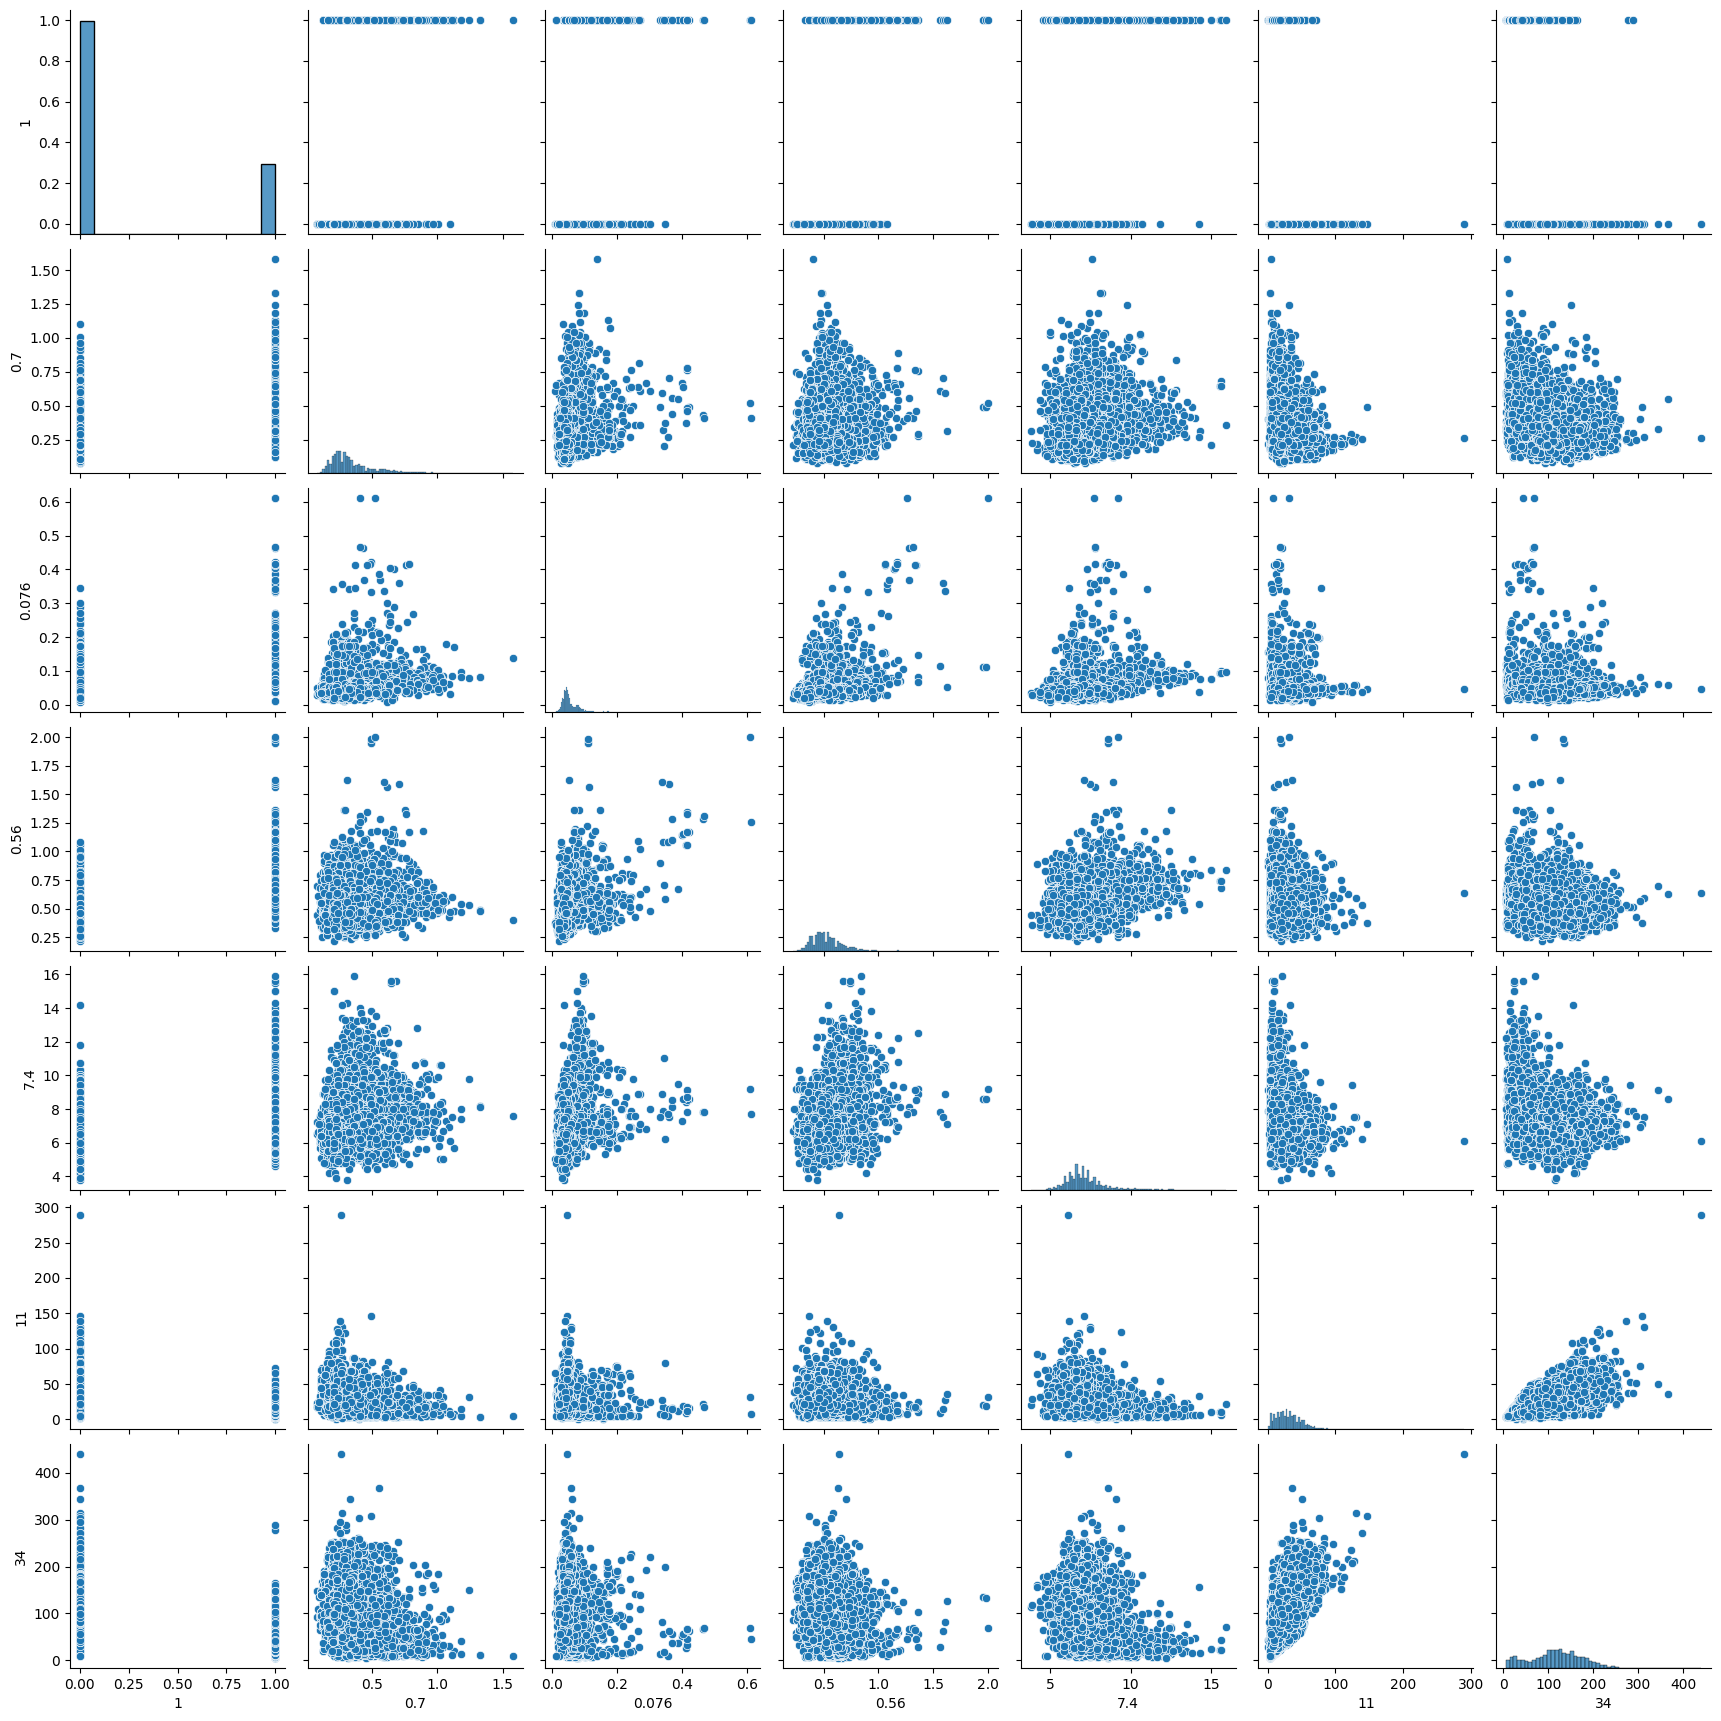

In [ ]:
cols = ['1','0.7','0.076', '0.56','7.4','11','34']
sns.pairplot(df[cols])
plt.show()

In [ ]:
# 주택 가격 예측 모델
#집 값을 제외한 나머지 열을 저장합니다
cols_train=['0.7','0.076', '0.56','7.4','11','34']
X_train_pre = df[cols_train]

#집 값을 저장합니다
y = df['1']

# 전체의 80%를 학습용, 20%를 테스트셋으로지정
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, shuffle=True, test_size=0.2, random_state=123)

#모델의 구조를 설정
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

#모델 실행
model.compile(optimizer='adam', loss='mean_squared_error')

# 실행 관련 설정을 하는 부분, 전체의 20%를 검증셋으로 설정
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.25)
#모델 평
test_loss = model.evaluate(X_test, y_test)
print('test_loss:', test_loss)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 40)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 159.0062 - val_loss: 0.6750
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3670 - val_loss: 0.0982
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0751 - val_loss: 0.0772
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0824 - val_loss: 0.0704
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0668 - val_loss: 0.0649
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0588 - val_loss: 0.0606
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0626 - val_loss: 0.0595
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0583 - val_loss: 0.0616
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0534 - val_loss: 0.0571
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0535 - val_loss: 0.0584
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0550 - val_loss: 0.0556
Epoch 12/200
122/122 ━━━━━━━━━━━━━━━━━━

In [ ]:
# 학습된 모델로 SalePrice 예측 시연
real_prices = []
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값 출력해보기
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test.iloc[i]
    prediction = Y_prediction[i]

    print(f"실행번호: {n_iter}, 실제 가격: {round(real)}, 예상가격: {round(prediction)}")
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter +1
    X_num.append(n_iter)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
실행번호: 0, 실제 가격: 1, 예상가격: 1
실행번호: 1, 실제 가격: 0, 예상가격: 0
실행번호: 2, 실제 가격: 0, 예상가격: 0
실행번호: 3, 실제 가격: 0, 예상가격: 0
실행번호: 4, 실제 가격: 1, 예상가격: 1
실행번호: 5, 실제 가격: 0, 예상가격: 0
실행번호: 6, 실제 가격: 0, 예상가격: 0
실행번호: 7, 실제 가격: 0, 예상가격: 0
실행번호: 8, 실제 가격: 1, 예상가격: 1
실행번호: 9, 실제 가격: 1, 예상가격: 1
실행번호: 10, 실제 가격: 0, 예상가격: 0
실행번호: 11, 실제 가격: 0, 예상가격: 0
실행번호: 12, 실제 가격: 0, 예상가격: 0
실행번호: 13, 실제 가격: 0, 예상가격: 0
실행번호: 14, 실제 가격: 0, 예상가격: 0
실행번호: 15, 실제 가격: 0, 예상가격: 0
실행번호: 16, 실제 가격: 1, 예상가격: 1
실행번호: 17, 실제 가격: 0, 예상가격: 0
실행번호: 18, 실제 가격: 0, 예상가격: 0
실행번호: 19, 실제 가격: 1, 예상가격: 1
실행번호: 20, 실제 가격: 1, 예상가격: 1
실행번호: 21, 실제 가격: 1, 예상가격: 1
실행번호: 22, 실제 가격: 0, 예상가격: 0
실행번호: 23, 실제 가격: 1, 예상가격: 1
실행번호: 24, 실제 가격: 0, 예상가격: 0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/kdt_240424/m6_dl/data/wine.csv', header=None)

# 와인의 속성을 x로 와인의 분류를 y로 두기

X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

# 학습 데이터셋과 테스트셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=0)

#모델 구조 설정
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25,verbose = 0)

# 테스트 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9469 - loss: 0.1328 
Test accuracy: 0.9492307901382446


### seed 설정
- NumPy의 무작위 작업에 대한 전역 제어를 위해 np.random.seed를 설정.
- np.random.seed(123)를 설정해도 스크립트를 실행할 때마다 정확히 동일한 학습 평가데이터 분할이 재현되도록 보장하려는 경우 train_test_split과 같은 scikit-learn 함수에 random_state를 지정.
- TensorFlow를 사용하는 경우 TensorFlow 작업에 tf.random.set_seed를 사용하며 신경망 레이어의 무작위 가중치 초기화, 훈련 프로세스의 임의성(예: , 이 특정 코드에 없는 드롭아웃 레이어를 사용하는 경우) 또는 임의성을 포함하는 기타 TensorFlow 작업을 사용하는 경우에 적용. 단순한 모델이나 특정 데이터 세트에 대해 훈련된 모델은 다양한 초기화에서 성능에 큰 변화를 나타내지 않을 수 있다
- Python 내장 random 모듈이 스크립트의 어느 곳에서나 사용되는 경우 해당 모듈의 시드를 설정. TensorFlow 작업 자체에 'python_random.seed(123)'를 직접 사용할 필요가 없지만 스크립트 시작 부분에 python_random.seed(123)를 설정하면 난수 생성을 위해 내장된 python random 모듈을 사용하는 모든 Python 작업에 영향을 미칠 수 있다.

.keras 파일
- 기본적으로 TensorFlow의 SavedModel 형식을 따릅니다. 이는 TensorFlow의 공식 모델 저장 형식으로, 모델 아키텍처, 가중치, 그리고 훈련 구성(옵티마이저 상태 등)을 포함할 수 있습니다.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# 모델의 저장 조건을 설정합니다
modelpath='/content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/{epoch:02d}-{val_loss:.4f}.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose = 1)

#모델 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.25, callbacks=[checkpointer], verbose=0)


Epoch 1: saving model to /content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/01-0.1217.keras

Epoch 2: saving model to /content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/02-0.1156.keras

Epoch 3: saving model to /content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/03-0.1214.keras

Epoch 4: saving model to /content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/04-0.1046.keras

Epoch 5: saving model to /content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/05-0.0987.keras

Epoch 6: saving model to /content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/06-0.0896.keras

Epoch 7: saving model to /content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/07-0.0896.keras

Epoch 8: saving model to /content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/08-0.0875.keras

Epoch 9: saving model to /content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/09-0.0949.keras

Epoch 10: saving model to /content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/10-0.0793.keras

Epoch 11: saving model to /c

In [ ]:
# 테스트 결과 출력
score = model.evaluate(X_test,y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9579 - loss: 0.1034
Test accuracy: 0.9576923251152039


## 그래프로 과적합 확인하기


History 객체

- 신경망 훈련을 위해 Keras 또는 TensorFlow 사용 시 model.fit()과 같은 호출로 훈련 작업을 실행하면 History 객체가 반환. 이 객체에는 연속적인 에포크의 훈련 손실 값과 측정항목 값 기록뿐만 아니라 해당하는 경우 검증 손실 값과 검증 측정항목 값도 포함.
- 코드에서 얻은 History 객체의 내용을 보려면 훈련 과정 중에 기록된 측정항목이 포함된 사전인 history 속성에 액세스. 'history.history' 사전의 각 키는 훈련 중에 모니터링된 측정항목에 해당

In [ ]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라시간이 다소 걸릴 수 있음)
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0)

In [ ]:
# Print the keys of the history object to understand what metrics are available
print(history.history.keys())

# To access a specific metic, for example, the training loss, you can do
print(history.history['loss'])

# if you also habe validation metrics, you can access them like this
print(history.history['val_loss'])  # For validation loss

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0.06958438456058502, 0.057617612183094025, 0.050620004534721375, 0.04884451627731323, 0.0470183826982975, 0.04672780632972717, 0.046756356954574585, 0.0464358851313591, 0.046377625316381454, 0.04599607363343239, 0.04626403748989105, 0.04590637609362602, 0.04593900218605995, 0.046208836138248444, 0.045919060707092285, 0.04691113531589508, 0.045959457755088806, 0.0459890179336071, 0.04604840278625488, 0.04562345892190933, 0.045474402606487274, 0.04563011974096298, 0.04545577988028526, 0.04552718624472618, 0.04525657370686531, 0.04526510089635849, 0.04524851590394974, 0.04544768109917641, 0.04521758481860161, 0.04519606754183769, 0.04515631124377251, 0.044857654720544815, 0.0448477566242218, 0.044906068593263626, 0.0449378676712513, 0.04487193003296852, 0.04477712884545326, 0.044654183089733124, 0.0451667495071888, 0.04497817903757095, 0.04464995861053467, 0.04469258710741997, 0.044475872069597244, 0.04448290541768074, 0.0444589

In [ ]:
# history에 저장된 학습 결과를 확인
hist_df = pd.DataFrame(history.history)
hist_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.978188,0.069584,0.981538,0.058261
1,0.984347,0.057618,0.987692,0.047628
2,0.984604,0.050620,0.987692,0.047627
3,0.984347,0.048845,0.985385,0.047732
4,0.985373,0.047018,0.988462,0.047241


In [ ]:
hist_df.shape

(2000, 4)

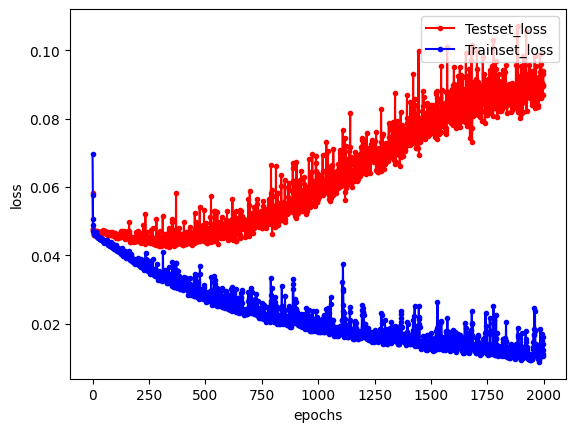

In [ ]:
import matplotlib.pyplot as plt

# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다
y_vloss = hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다
y_loss=hist_df['loss']

# x값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋늬 오차를 파란색으로 표시합니다
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

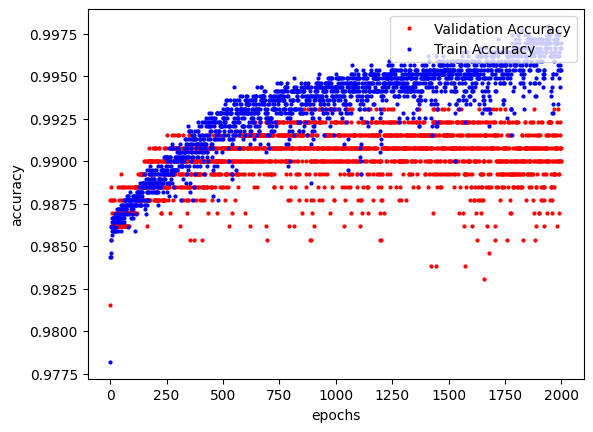

In [ ]:
# history 객체에서 학습셋과 검증셋의 정확도를 가져옵니다.
# 'acc' 대신 'accuracy'를 사용해야 할 수도 있습니다. 이는 keras 버전에 따라 다릅니다.
y_acc = history.history['accuracy']
y_val_acc = history.history['val_accuracy']

# x값을 지정하빈다
x_len = np.arange(len(y_acc))

# 검증셋의 정확도를 빨간색으로, 학습셋의 정확도를 파란색으로 표시합니다.
plt.plot(x_len, y_val_acc, 'o',c = 'red', markersize=2,label='Validation Accuracy')
plt.plot(x_len, y_acc, 'o',c = 'blue', markersize=2,label='Train Accuracy')

plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()


## 학습의 자동중단

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd
import random as python_random
import tensorflow as tf


np.random.seed(123)  # Numpy module.
python_random.seed(123)  # Python random module.
tf.random.set_seed(123)  # TensorFlow module.

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/kdt_240424/m6_dl/data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

[ callback ]

callbacks=[early_stopping_callback, checkpointer]

학습 과정 중에 특정 이벤트가 발생했을 때, 취할 행동을 정의.

- early_stopping_callback: 이 콜백은 모델의 성능이 더 이상 개선되지 않을 때 학습을 조기에 중단하도록 설정. 예를 들어, 검증 데이터에 대한 손실이 일정 기간 동안 개선되지 않으면 학습을 멈춘다. 이는 과적합을 방지하고 학습 시간을 단축시키는 데 도움이 된다.
- checkpointer: 이 콜백은 모델의 중간 학습 상태를 파일로 저장하여, 학습 과정에서 가장 좋은 모델을 보존할 수 있게 한다. 이를 통해 나중에 모델을 재사용하거나, 학습 과정이 끝난 후 최적의 모델 상태로 복원할 수 있다.

이 코드는 신경망 모델의 학습 과정을 세밀하게 제어하면서, 과적합을 방지하고, 학습 과정에서 모델의 최적 상태를 저장하는 방법을 보여준다.

## 학습의 자동 중단 및 최적화 모델 저장

In [ ]:
# 학습이 언제 자동  중단 될지를 설정합니다
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30)

#최적화 모델이 저장될 펄더와 모델의 이름을 정합니다
modelpath="/content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/bestmodel.keras"

#최적화 모델을 업데이트하고 저장합니다
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델을 실행합니다
history = model.fit(X_train, y_train, validation_split=0.25, epochs=500, batch_size=500, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/500
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9700 - loss: 0.0915
Epoch 1: val_loss improved from inf to 0.08362, saving model to /content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9711 - loss: 0.0979 - val_accuracy: 0.9692 - val_loss: 0.0836
Epoch 2/500
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9720 - loss: 0.0900
Epoch 2: val_loss improved from 0.08362 to 0.08305, saving model to /content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9718 - loss: 0.0969 - val_accuracy: 0.9700 - val_loss: 0.0830
Epoch 3/500
1/8 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.9720 - loss: 0.0885
Epoch 3: val_loss improved from 0.08305 to 0.08246, saving model to /content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9722 - loss: 0.0961 - val_accuracy: 0.9708 - val_loss:

In [ ]:
# 테스트 결과를 출력합니다
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9903 - loss: 0.0343
Test accuracy: 0.9876922965049744


In [ ]:
# 최적화된 모델이 bestmodel.keras 파일에 저장되면, 이 파일을 로드하여 예측 도는 추가 학습에 사용
from tensorflow.keras.models import load_model
#저장된 모델 로드
best_model_path  = '/content/drive/MyDrive/kdt_240424/m6_dl/data/model/all/bestmodel.keras'
best_model = load_model(best_model_path)

# 모델 요약 출력 (선택사항)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,627 (10.27 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,752 (6.85 KB)